In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

%matplotlib inline 

In [2]:
#Load Data
bc = datasets.load_breast_cancer()
df = pd.DataFrame(bc.data,columns=bc.feature_names)
print(df.shape)
pd.set_option('max_columns', len(df.columns))
df.head(2)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
#Standardization
ss = StandardScaler() # we instantiate it as a matter of good practice
data_scaled = ss.fit_transform(df)

In [5]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [6]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids[0])
print(labels[0:10])

[0.97397614 0.48151381 1.0066346  0.96352718 0.60925407 1.020696
 1.13942935 1.16458212 0.61113855 0.25222982 0.85859633 0.04274078
 0.86027888 0.8071077  0.01706063 0.69505052 0.63689512 0.77623856
 0.14038222 0.41503212 1.04008365 0.50631048 1.06597067 1.00315418
 0.60829274 0.95083725 1.04429844 1.14621103 0.59741617 0.62246932]
[0 0 0 0 0 0 0 0 0 0]


In [7]:
#Evaluation
metrics.accuracy_score(bc.target, labels)

0.9103690685413005

In [8]:
print(metrics.classification_report(bc.target, labels))

             precision    recall  f1-score   support

          0       0.93      0.83      0.87       212
          1       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569



Confusion matrix, without normalisation
[[175  37]
 [ 14 343]]
Normalised confusion matrix
[[0.83 0.17]
 [0.04 0.96]]


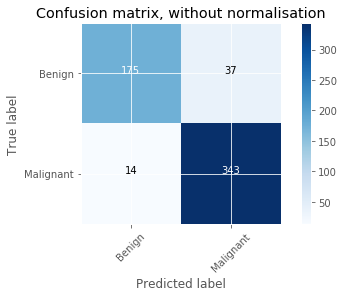

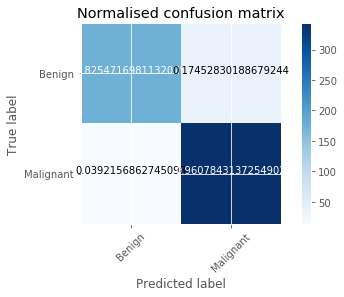

In [9]:
# helper functions from sklearn docs
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalised confusion matrix")
    else:
        print('Confusion matrix, without normalisation')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = metrics.confusion_matrix(bc.target, labels)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Benign","Malignant"],
                      title='Confusion matrix, without normalisation')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Benign","Malignant"], normalize=True,
                      title='Normalised confusion matrix')

plt.show()

In [10]:
#Silhouette Score
print("The Silhouette score for k=2 is:",metrics.silhouette_score(data_scaled,labels))

The Silhouette score for k=2 is: 0.34497400510344084


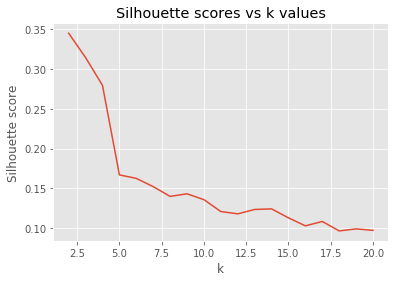

In [11]:
silhouette_scores = [None,None]
for i in range(2,21):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    labels_ = kmeans.labels_
    score = metrics.silhouette_score(data_scaled, labels_)
    silhouette_scores.append(score)
plt.plot(silhouette_scores)
plt.title("Silhouette scores vs k values")
plt.ylabel("Silhouette score")
plt.xlabel("k")
plt.show()

In [12]:
#Comparing cluster labels
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [13]:
true1 = [True if i==1 else False for i in labels.tolist()]
true0 = [True if i==0 else False for i in labels.tolist()]

In [14]:
true1y = [True if i==1 else False for i in bc.target]
true0y = [True if i==0 else False for i in bc.target]

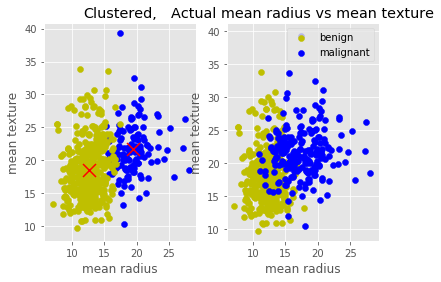

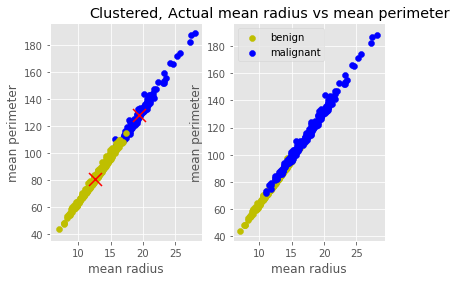

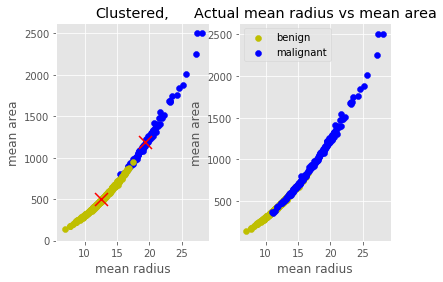

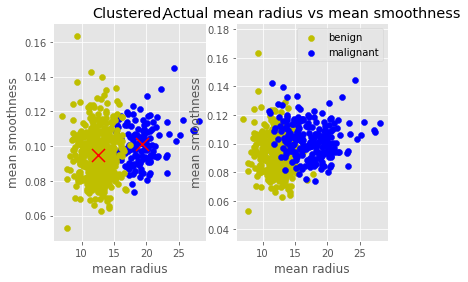

In [15]:
count = 0
for m,i in enumerate(df.columns.tolist()):
    for n,j in enumerate(df.columns.tolist()):
        if i!=j and count <4:
            fig = plt.figure()
            
            ax1 = fig.add_subplot(121)
            ax1.scatter(df[true1][i],df[true1][j], c="b")
            ax1.scatter(df[true0][i],df[true0][j], c="y")
            ax1.scatter(centroids[:, m], centroids[:, n],
                        marker='x', s=169, linewidths=3,
                        color='r', zorder=10)
            title1 = "Clustered,"
            ax1.set_title(title1)
            ax1.set_xlabel(i)
            ax1.set_ylabel(j)
            
            ax2 = fig.add_subplot(122)
            ax2.scatter(df[true1y][i],df[true1y][j], c="y")
            ax2.scatter(df[true0y][i],df[true0y][j], c="b")
            title2 = "Actual "+ i + " vs " + j
            ax2.set_title(title2)
            ax2.set_xlabel(i)
            ax2.set_ylabel(j)

            plt.legend(['benign','malignant'])
            plt.show()
            count += 1